# Data preparation

This notebook loads the training dataset, split it in train/test folds and save it to disk.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

This notebook is parameterized to work with [Papermill](https://papermill.readthedocs.io).
The following cell contains the default values of the parameters.

In [2]:
train_size = 5000
test_size = 10000
result_file = "test_dataset.npz"

Load MNIST data from [OpenML](https://www.openml.org/d/554).

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

This dataset contains images of digits. Here is a sample.

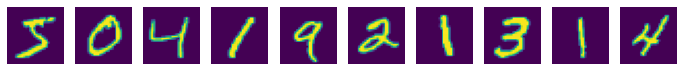

In [4]:
_, axes = plt.subplots(1, 10, figsize=(12, 5))
for ax, digit in zip(axes, X):
    ax.imshow(digit.reshape(28, 28))
    ax.axis("off")

Let's split the dataset in train/test folds of given size.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=train_size, test_size=test_size, random_state=42
)

We save the dataset on disk.

In [6]:
result_path = Path(result_file)
result_path.parent.mkdir(parents=True, exist_ok=True)
np.savez(result_path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)